### Титаник.

Домашнее задание.

In [1]:
import numpy as np
import pandas as pd

In [2]:
from  matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

###  Данные

Прочитаем тренировочные и тестовые данные.

In [3]:
train = pd.read_csv('titanic/train.csv')
test  = pd.read_csv('titanic/test.csv')

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Feature еngeneering

Создаем и описываем фичи.
Чтобы не дублировать операции для тренировочной тестовой выборки, объединим их:
- удалим целевой столбеци из train
- добавим флаг тестовой выборки
- проверим, что что поля совпадают.

In [5]:
y_train = train.Survived

In [6]:
train.drop('Survived',axis=1,inplace=True)

In [7]:
train['is_test'] = 0
test['is_test'] = 1

In [8]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [9]:
df = pd.concat([train,test])

In [10]:
df['IsMale'] = df.Sex.replace({'male':1, 'female':0})

Создадим кучку фич на основе имени

In [11]:
df['HaveMrs'] = df.Name.str.contains('mrs.', case=False)
df.HaveMrs.replace({True:1, False : 0}, inplace=True)

df['HaveMr'] = df.Name.str.contains('mr\.', case = False)
df.HaveMr.replace({True : 1, False : 0},inplace=True)

df['HaveRev'] = df.Name.str.contains('rev\.', case = False)
df.HaveRev.replace({True : 1, False : 0},inplace=True)

df['HaveMiss'] = df.Name.str.contains('miss\.', case = False)
df.HaveMiss.replace({True : 1, False : 0},inplace=True)

df['HaveDr'] = df.Name.str.contains('dr\.', case = False)
df.HaveDr.replace({True : 1, False : 0},inplace=True)

df['HaveMaster'] = df.Name.str.contains('master\.', case = False)
df.HaveMaster.replace({True : 1, False : 0},inplace=True)

df['HaveCol'] = df.Name.str.contains('col\.', case = False)
df.HaveCol.replace({True : 1, False : 0},inplace=True)

Немного ручной работы - проверим, что регексп работает корректно создадим файл и посмотрим его.

In [13]:
sdf = df.loc[:,['Name','HaveMrs']]
sdf.sort_values('HaveMrs',ascending=False,inplace=True)
sdf.to_csv('have_mrs.csv')

Давим фичу HaveCabin - проверим у кого указана каюта.

In [15]:
df['HaveCabin'] = df.Cabin.isnull()
df.HaveCabin.replace({True : 1, False : 0},inplace=True)

In [16]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,is_test,IsMale,HaveMrs,HaveMr,HaveRev,HaveMiss,HaveDr,HaveMaster,HaveCol,HaveCabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,1,0,1,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0,0,1,0,0,0,0,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,1,0,0,0,0,0,0,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,1,0,1,0,0,0,0,0,1


Все оставшивиеся текстовые поля удалим.

In [18]:
df.drop(['PassengerId','Name','Sex','Ticket','Cabin'],axis=1,inplace=True)

In [19]:
df.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'is_test',
       'IsMale', 'HaveMrs', 'HaveMr', 'HaveRev', 'HaveMiss', 'HaveDr',
       'HaveMaster', 'HaveCol', 'HaveCabin'],
      dtype='object')

Поля - категогории разобьем на несколько столбцов

In [20]:
df_dummies = pd.get_dummies(df, columns=['Pclass','Embarked'])
df_dummies.columns


Index(['Age', 'SibSp', 'Parch', 'Fare', 'is_test', 'IsMale', 'HaveMrs',
       'HaveMr', 'HaveRev', 'HaveMiss', 'HaveDr', 'HaveMaster', 'HaveCol',
       'HaveCabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

Разделим тренировочную и тестовую выборку.

In [21]:
X_train = df_dummies[df_dummies.is_test == 0].drop('is_test',axis = 1)
X_test = df_dummies[df_dummies.is_test == 1].drop('is_test', axis = 1)

### Заполнение пустых значений. 

Пустые значения заполняем средними.
На основе обучающей выборки создаем imputer.

In [22]:
from sklearn.preprocessing import Imputer

In [23]:
columns = X_train.columns

In [24]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis = 0, verbose=1, copy = True)

In [25]:
imputer.fit(X_train)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=1)

In [26]:
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=columns)

### Нормировка значений

Для обучающей выборки создаем scaler - нормировщик.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X_train_imputed)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
X_train_i_s = scaler.transform(X_train_imputed)
X_train_i_s = pd.DataFrame(X_train_i_s, columns = columns)

 #### Заполняем пустые значения и нормируем тестовую выборку
 
Используем объекты imputer и scaler, обученные на обучающей выборке. Применяем эти объекты к тестовой выборке.

In [31]:
X_test_i_s = scaler.transform(imputer.transform(X_test))

#### Offtop - визуализируем, посмотрим, нет ли кластеров.

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)

In [34]:
ppl = pca.fit_transform(X_train_i_s)

In [35]:
pca.explained_variance_ratio_

array([ 0.17983323,  0.14512653])

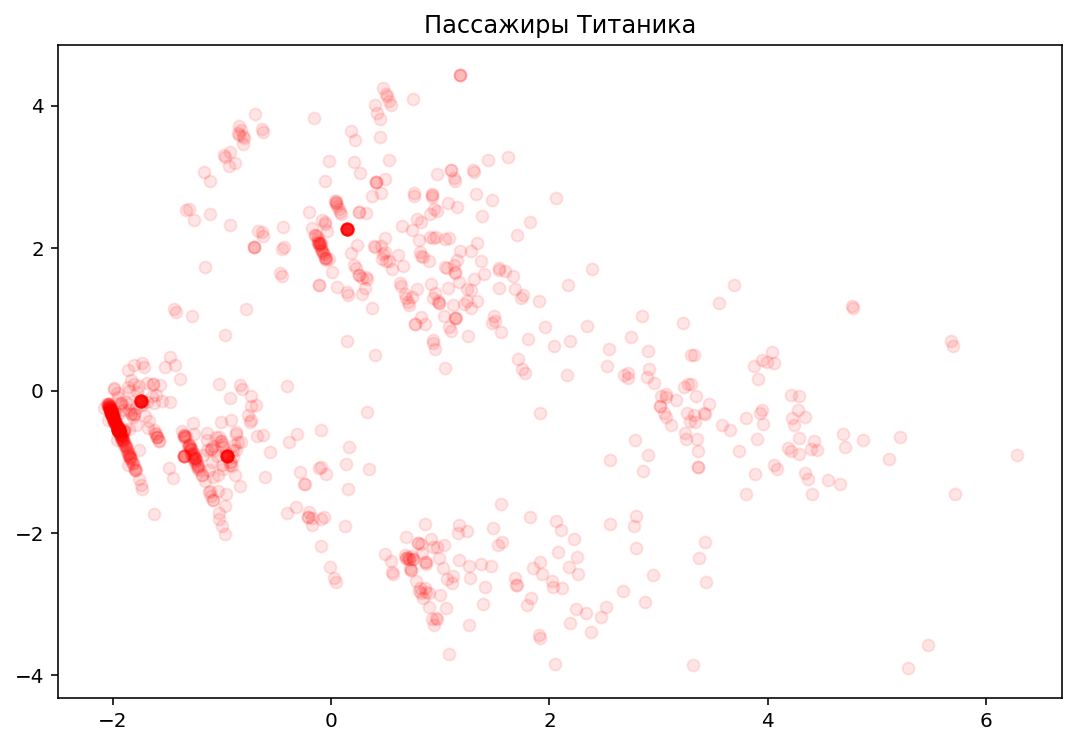

In [36]:
plt.plot(ppl[:,0], ppl[:,1], 'ro', alpha=0.1)
plt.title('Пассажиры Титаника')

# Обучение без кросс-валидации
### Используем классификатор

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
clf = DecisionTreeClassifier()

In [39]:
clf.fit(X_train_i_s,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
clf.predict(X_test_i_s)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0,

([<matplotlib.axis.YTick at 0x1a1f1a5978>,
 <a list of 19 Text yticklabel objects>)

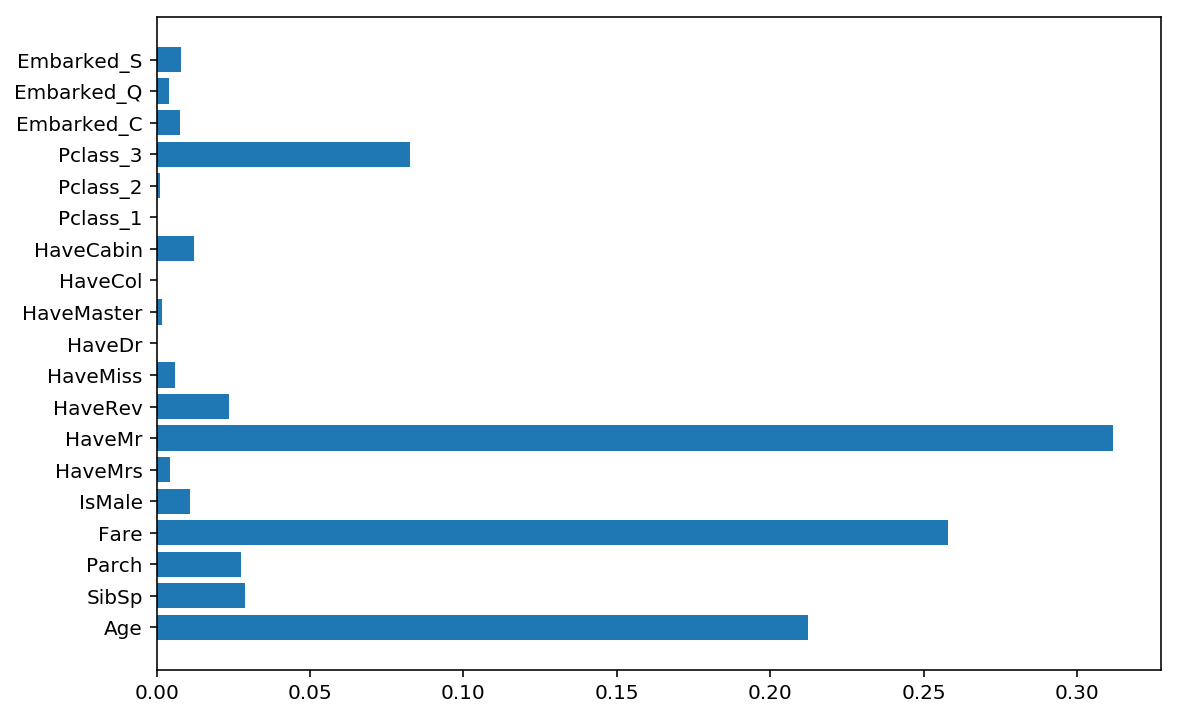

In [41]:
plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X_train_i_s.columns)),X_train_i_s.columns)

# Кросс-валидация


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
params = [{'max_depth': list(range(1,20))}]

In [44]:
gs = GridSearchCV(DecisionTreeClassifier(), params, scoring = 'accuracy')

In [45]:
gs.fit(X_train_i_s, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [46]:
gs.best_params_

{'max_depth': 4}

In [47]:
model = DecisionTreeClassifier(max_depth=4)

In [48]:
model.fit(X_train_i_s, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
predictions = model.predict_proba(X_train_i_s)

In [50]:
from sklearn.metrics import roc_auc_score

In [51]:
roc_auc_score(y_train, predictions[:,1])

0.89529607260409683

Рисуем граф

In [53]:
from sklearn.tree import export_graphviz

In [54]:
def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [55]:
get_tree_dot_view(model, X_train_i_s.columns)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="HaveMr <= -0.163\ngini = 0.473\nsamples = 891\nvalue = [549, 342]", fillcolor="#e5813960"] ;
1 [label="Pclass_3 <= -0.103\ngini = 0.422\nsamples = 374\nvalue = [113, 261]", fillcolor="#399de591"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="HaveRev <= 6.031\ngini = 0.209\nsamples = 202\nvalue = [24, 178]", fillcolor="#399de5dd"] ;
1 -> 2 ;
3 [label="IsMale <= -0.309\ngini = 0.167\nsamples = 196\nvalue = [18, 178]", fillcolor="#399de5e5"] ;
2 -> 3 ;
4 [label="gini = 0.1\nsamples = 170\nvalue = [9, 161]", fillcolor="#399de5f1"] ;
3 -> 4 ;
5 [label="gini = 0.453\nsamples = 26\nvalue = [9, 17]", fillcolor="#399de578"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 6\nvalue = [6, 0]", fillcolor="#e58139ff"] ;
2 -> 6 ;
7 [label="Fare <= -0.178\ngini = 0.499\nsamples = 172\nvalue = [89, 83]", fillcolor="#e5813911"] ;
1 -> 7 ;
8 [label="Age <= 0.523\ngini = 0.473\nsamples = 128\nvalue = [49, 79]

![mlvd](TreeGraph.png)

In [56]:
y_test = model.predict(X_test_i_s)
y_test_proba = model.predict_proba(X_test_i_s)

Построим график значимости фичей. График и дерево показывают, что самые важные особеннсти - наличие в имени 'mr.', цена билета, третий класс, возраст.  В дереве также учтены созданные поля HaveCabin, HaveRev.

([<matplotlib.axis.YTick at 0x1a1f9e1c88>,
 <a list of 19 Text yticklabel objects>)

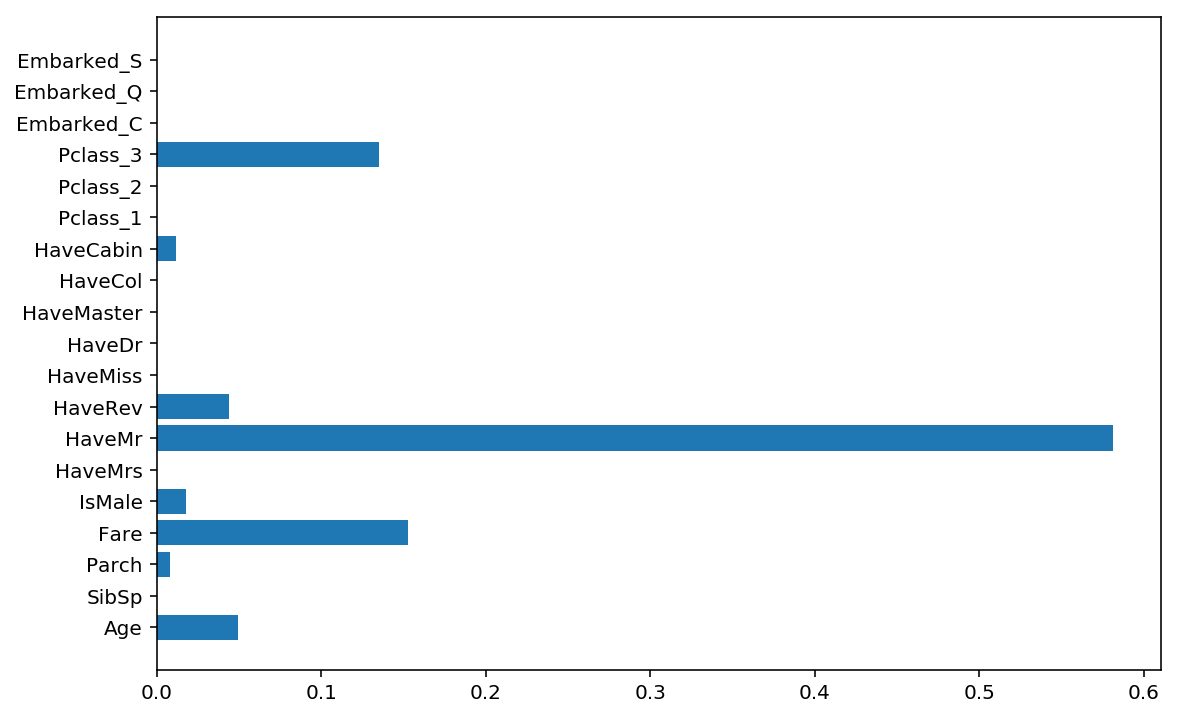

In [57]:
plt.barh(np.arange(len(model.feature_importances_)), model.feature_importances_)
plt.yticks(np.arange(len(X_train_i_s.columns)),X_train_i_s.columns)

Создаем сабмит

In [59]:
submit = pd.DataFrame(test.PassengerId)
submit['Survived'] = y_test
submit.tail()
submit.to_csv('submit.csv', index = False)